In [105]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import tqdm
from multiprocessing import Pool

In [121]:
DS = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2000.zarr')
DS.coords['latitude']

<xarray.DataArray 'latitude' (latitude: 192)> Size: 2kB
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * latitude  (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [120]:
DS = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs_latlon.nc')
DS.coords['latitude']

<xarray.DataArray 'latitude' (latitude: 192)> Size: 2kB
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * latitude  (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    time      object 8B ...
Attributes:
    long_name:  latitude
    units:      degrees_north

In [126]:
# static files (no time coordinate)
ds_static = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs_latlon.nc')
ds_upper_air = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2000.zarr')

coord_upper_air = (ds_upper_air.coords.keys())
coord_static = list(ds_static.coords.keys())
# coord_static = remove_string_by_pattern(coord_static, "time")

assert all(
    coord_name in coord_upper_air for coord_name in coord_static
), "Static file coordinate names mismatched with upper-air files"

for coord_name in coord_static:
    print(coord_name)
    print(ds_static)
    assert ds_upper_air.coords[coord_name].equals(
        ds_static.coords[coord_name]
    ), "coordinate {} mismatched between upper-air and static files".format(
        coord_name
    )

latitude
<xarray.Dataset> Size: 104MB
Dimensions:       (latitude: 192, longitude: 288, nrdg: 16, ilev: 33, level: 32)
Coordinates:
  * latitude      (latitude) float64 2kB -90.0 -89.06 -88.12 ... 89.06 90.0
  * longitude     (longitude) float64 2kB 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
    time          object 8B ...
  * level         (level) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
Dimensions without coordinates: nrdg
Data variables: (12/29)
    PHIS          (latitude, longitude) float64 442kB ...
    LANDFRAC      (latitude, longitude) float64 442kB ...
    SGH           (latitude, longitude) float64 442kB ...
    SGH30         (latitude, longitude) float64 442kB ...
    LANDM_COSLAT  (latitude, longitude) float64 442kB ...
    TERR_UF       (latitude, longitude) float64 442kB ...
    ...            ...
    hyai          (ilev) float64 264B ...
    hybi          (ilev) float64 264B ...
    hyam  

AssertionError: coordinate latitude mismatched between upper-air and static files

In [132]:
ds_upper_air['latitude'].equals(ds_static.coords['latitude'])
ds_upper_air['latitude'] ==  ds_static.coords['latitude']


False

In [135]:
(ds_upper_air['latitude'] ==  ds_static.coords['latitude']).all()


<xarray.DataArray 'latitude' ()> Size: 1B
array(True)
Coordinates:
    time     object 8B ...

In [ ]:
ds_static.drop_vars('time').to_netcdf('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs_latlon_v2.nc')

In [10]:
filer = '/glade/derecho/scratch/schreck/repos/miles-credit/results/wxformer/quarter/large_multi/weights/'
hours = [1, 12, 24, 48, 72, 120]

In [14]:
def read_csv_file(file_path):
    """Read a CSV file and return the DataFrame."""
    return pd.read_csv(file_path)

# Dictionary to store data for each hour
df_dict = {}

# Loop through each hour and load the data in parallel
for hour in hours:
    file_pattern = os.path.join(filer, str(hour), 'forecasts', 'metrics', '*.csv')
    csv_files = glob.glob(file_pattern)

    # Initialize the tqdm progress bar
    with Pool(8) as pool:
        data_frames = list(tqdm.tqdm(pool.map(read_csv_file, csv_files), total=len(csv_files)))

    # Concatenate the DataFrames and store them in the dictionary
    df_dict[hour] = pd.concat(data_frames[:365], ignore_index=True)

100%|██████████| 384/384 [00:00<00:00, 1961769.47it/s]


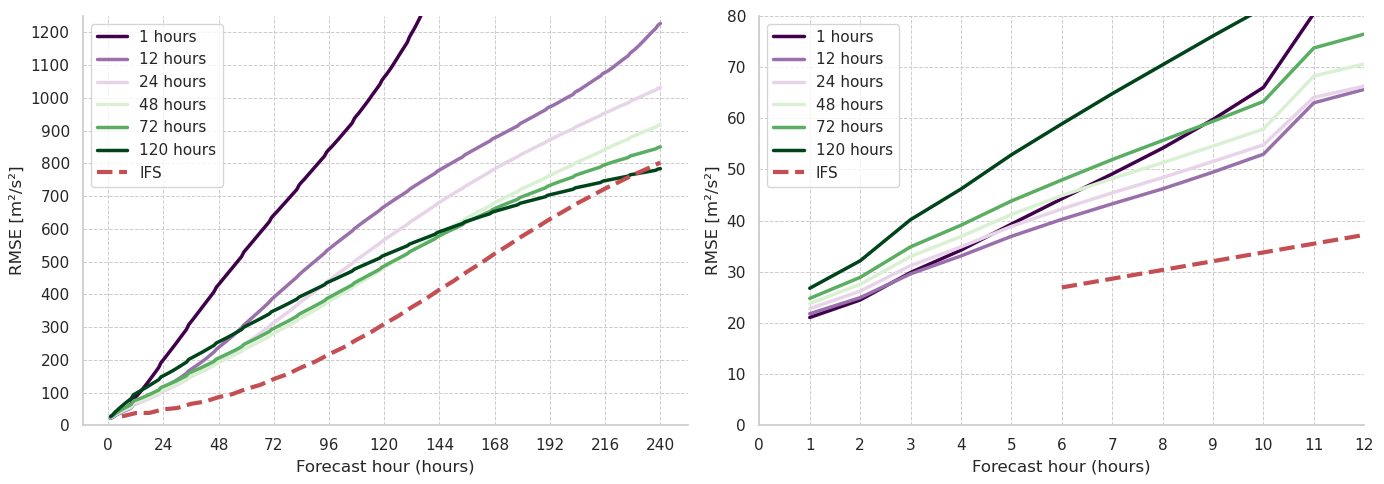

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

BB = np.load('/glade/campaign/cisl/aiml/ksha/CREDIT_arXiv/PLOT_data/scores_CREDIT_arXiv_2024_fuxi_wxformer.npy', allow_pickle=True)
IFS = BB.item()['RMSE_IFS_Z500_mean'] 
TT = np.arange(6,246,6)

# Use seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a new figure for the plots with 2 columns and 1 row
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Set up a color map that transitions from red to blue
colors = plt.cm.PRGn(np.linspace(0, 1, len(hours)))

# Loop through each hour, read the corresponding CSV file, and plot the data in both subplots
for idx, k in enumerate(hours):
    df = df_dict[k].groupby('forecast_hour').mean().reset_index()
    axes[0].plot(df["forecast_hour"], df["rmse_Z500"], label=f'{k} hours', linewidth=2.5, color=colors[idx])
    axes[1].plot(df["forecast_hour"], df["rmse_Z500"], label=f'{k} hours', linewidth=2.5, color=colors[idx])

# Customize first subplot
axes[0].legend(title='Lead time (hours)', fontsize=10, title_fontsize='12')
axes[0].set_xlabel('Forecast hour (hours)', fontsize=12)
axes[0].set_ylabel('RMSE [m²/s²]', fontsize=12)
axes[0].set_xticks(range(0, df["forecast_hour"].max() + 1, 24))
axes[0].set_yticks(range(0, 1500 + 100, 100))
axes[0].set_ylim([0, 1250])
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)
axes[0].plot(TT, IFS, color='r',linewidth=3,linestyle='--',label='IFS')
axes[0].legend()

sns.despine(ax=axes[0])

# Customize second subplot
axes[1].legend(title='Lead time (hours)', fontsize=10, title_fontsize='12')
axes[1].set_xlabel('Forecast hour (hours)', fontsize=12)
axes[1].set_ylabel('RMSE [m²/s²]', fontsize=12)
axes[1].set_xticks(range(0, 25, 1))
axes[1].set_yticks(range(0, 210, 10))
axes[1].set_xlim([0, 12])
axes[1].set_ylim([0, 80])
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)
axes[1].plot(TT, IFS, color='r',linewidth=3,linestyle='--',label='IFS')
axes[1].legend()
sns.despine(ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.savefig('./RMSE_Z500_Lead.png',dpi=200,bbox_inches='tight')
plt.show()


In [56]:
DS = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1980.zarr')
DSs = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/std_6h_1979_2010_32lev_1.0deg_new.nc')
DSm = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/mean_6h_1979_2010_32lev_1.0deg_new.nc')

In [104]:
DStot = xr.combine_by_coords([DS1,DS2])
DStot

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 2, latitude: 192, longitude: 288, level: 32)
Coordinates:
  * time       (time) datetime64[ns] 16B 2010-01-02 2010-01-02T06:00:00
  * level      (level) int64 256B 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * latitude   (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
Data variables: (12/15)
    PRECT      (time, latitude, longitude) float32 442kB -0.5304 ... -0.1393
    CLDTOT     (time, latitude, longitude) float32 442kB -0.5066 ... 0.5226
    CLDHGH     (time, latitude, longitude) float32 442kB -0.4657 ... 0.782
    CLDLOW     (time, latitude, longitude) float32 442kB -0.5658 ... 0.7243
    CLDMED     (time, latitude, longitude) float32 442kB 0.664 0.6933 ... 0.6688
    TAUX       (time, latitude, longitude) float32 442kB 0.1786 ... -0.05976
    ...         ...
    FSNS       (time, latitude, longitude) float32 442kB -0.3578 ... -0.5871
    FLNS       (time, latitude, longitude) float32 442kB 0.5897 ... -0.4875
    FSNT       (time, latitude, longitude) float32 442kB -0.2753 ... -0.6272
    FLNT       (time, latitude, longitude) float32 442kB -1.072 -1.08 ... -1.082
    SHFLX      (time, latitude, longitude) float32 442kB -0.3811 ... -0.7079
    LHFLX      (time, latitude, longitude) float32 442kB -0.8262 ... -0.9197
Attributes:
    Conventions:  CF-1.11

In [8]:
varvar = 'U10'
DS1 = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer/2010-01-01T12Z/pred_2010-01-01T12Z_012.nc')
DS[varvar].squeeze().plot(cmap='RdBu',)
plt.show()
DS2 = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer/2010-01-01T12Z/pred_2010-01-01T12Z_018.nc')
DS[varvar].squeeze().plot(cmap='RdBu',)
plt.show()
# DS = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer/2010-01-01T00Z/pred_2010-01-01T00Z_180.nc')
# DS[varvar].squeeze().plot(cmap='RdBu',)
# plt.show()

NameError: name 'DS' is not defined

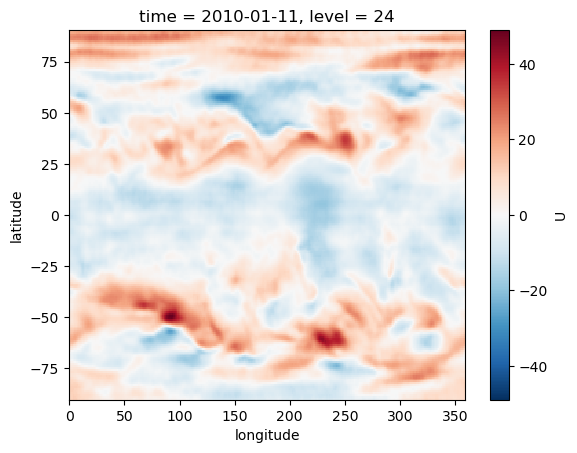

In [164]:
DS['U'].squeeze().sel(level=24).plot()
plt.show()

In [65]:
from datetime import datetime, timedelta
DS = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2010.zarr')
datetime64_times = np.array([np.datetime64(time.strftime("%Y-%m-%d %H:%M:%S"), 'ns') for time in DS["time"].values])
DS["time"] = datetime64_times


# ds_time_list = [np.datetime64(ds_time.values).astype(datetime) for ds_time in DS["time"]]
# ds_start_time = ds_time_list[0]
# ds_end_time = ds_time_list[-1]


# def nanoseconds_to_year(nanoseconds_value):
#     """
#     Given datetime info as nanoseconds, compute which year it belongs to.
#     """
#     return (
#         np.datetime64(nanoseconds_value, "ns").astype("datetime64[Y]").astype(int)
#         + 1970
#     )


In [6]:
DSforc = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.climaterun.statics_1.0deg.nc')

In [7]:
DSforc.sel(time='2010-01-03 00:00:00')[['SOLIN','z_norm','LANDM_COSLAT']]

<xarray.Dataset> Size: 1MB
Dimensions:       (time: 1, latitude: 192, longitude: 288)
Coordinates:
  * latitude      (latitude) float64 2kB -90.0 -89.06 -88.12 ... 89.06 90.0
  * longitude     (longitude) float64 2kB 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * time          (time) object 8B 2010-01-03 00:00:00
Data variables:
    SOLIN         (time, latitude, longitude) float64 442kB ...
    z_norm        (latitude, longitude) float64 442kB ...
    LANDM_COSLAT  (latitude, longitude) float64 442kB ...

In [12]:
DS  = xr.open_zarr('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_mlevel_1deg/all_in_one/ERA5_mlevel_1deg_6h_subset_2000_conserve.zarr')

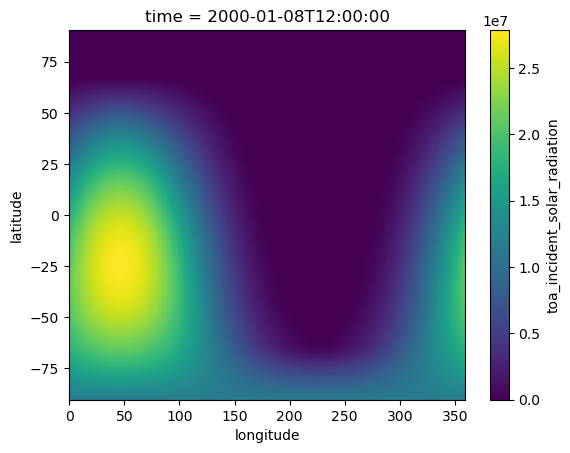

In [21]:
DS['toa_incident_solar_radiation'].isel(time=30).plot()

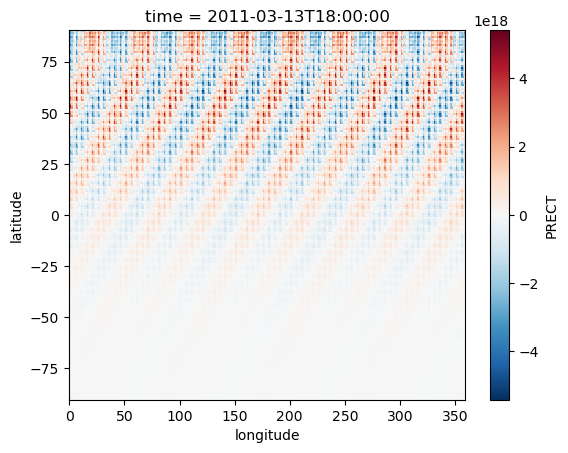

In [46]:
DS  = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer/2010-01-01T00Z/pred_2010-01-01T00Z_10482.nc')
DS['PRECT'].squeeze().plot()

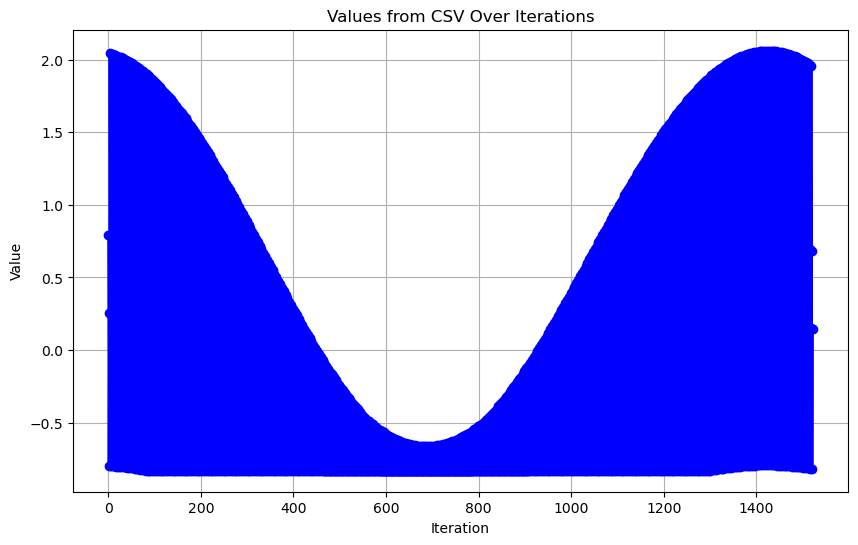

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('../../output_solin.csv', header=None, names=['Value'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values from CSV Over Iterations')
plt.grid(True)
plt.show()

In [144]:
DScesm = xr.open_zarr('//glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1999.zarr')
DSera5 = xr.open_zarr('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_mlevel_1deg/all_in_one/ERA5_mlevel_1deg_6h_subset_1999_conserve.zarr')

In [157]:
DScesm

<xarray.Dataset> Size: 164GB
Dimensions:    (time: 1460, latitude: 192, longitude: 288, level: 32, ilev: 33)
Coordinates:
  * ilev       (ilev) float64 264B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * latitude   (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * level      (level) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * longitude  (longitude) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time       (time) object 12kB 1999-01-01 00:00:00 ... 1999-12-31 18:00:00
Data variables: (12/42)
    CLDHGH     (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    CLDLOW     (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    CLDMED     (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    CLDTOT     (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    FLDS       (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    FLNS       (time, latitude, longitude) float64 646MB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    ...         ...
    V          (time, level, latitude, longitude) float64 21GB dask.array<chunksize=(4, 32, 192, 288), meta=np.ndarray>
    ZMMU       (time, level, latitude, longitude) float64 21GB dask.array<chunksize=(4, 32, 192, 288), meta=np.ndarray>
    hyai       (time, ilev) float64 385kB dask.array<chunksize=(4, 33), meta=np.ndarray>
    hyam       (time, level) float64 374kB dask.array<chunksize=(4, 32), meta=np.ndarray>
    hybi       (time, ilev) float64 385kB dask.array<chunksize=(4, 33), meta=np.ndarray>
    hybm       (time, level) float64 374kB dask.array<chunksize=(4, 32), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    case:              f.e21.CREDIT_climate
    host:              derecho7
    initial_file:      f.e20.FHIST.f09_f09.cesm2_1.001_v2.cam.i.1979-01-01-00...
    logname:           wchapman
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    source:            CAM
    time_period_freq:  hour_6
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...

In [156]:
DSera5

<xarray.Dataset> Size: 94GB
Dimensions:                        (time: 1460, latitude: 181, longitude: 360,
                                    level: 46)
Coordinates:
  * latitude                       (latitude) float32 724B 90.0 89.0 ... -90.0
  * level                          (level) float32 184B 1.0 2.0 ... 136.0 137.0
  * longitude                      (longitude) float32 1kB 0.0 1.0 ... 359.0
  * time                           (time) datetime64[ns] 12kB 1999-01-01 ... ...
Data variables: (12/22)
    MSL                            (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    SKT                            (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    SP                             (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    TCC                            (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    VAR_10U                        (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    VAR_10V                        (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    ...                             ...
    toa_incident_solar_radiation   (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    top_net_solar_radiation        (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    top_net_thermal_radiation      (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    total_precipitation            (time, latitude, longitude) float32 381MB dask.array<chunksize=(10, 181, 360), meta=np.ndarray>
    u_component_of_wind            (time, level, latitude, longitude) float32 18GB dask.array<chunksize=(10, 46, 181, 360), meta=np.ndarray>
    v_component_of_wind            (time, level, latitude, longitude) float32 18GB dask.array<chunksize=(10, 46, 181, 360), meta=np.ndarray>

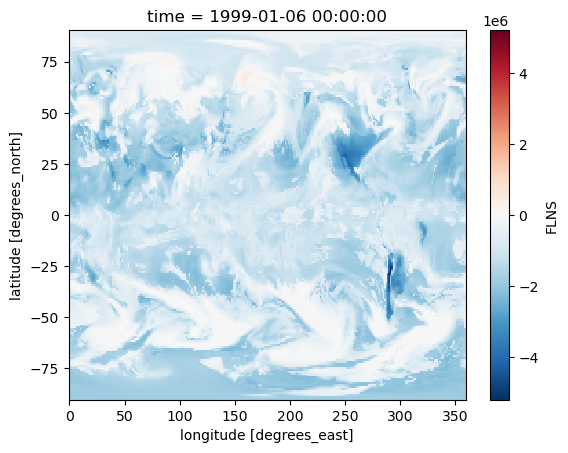

In [184]:
(DScesm['FLNS']*-21600).isel(time=20).plot()
plt.show()

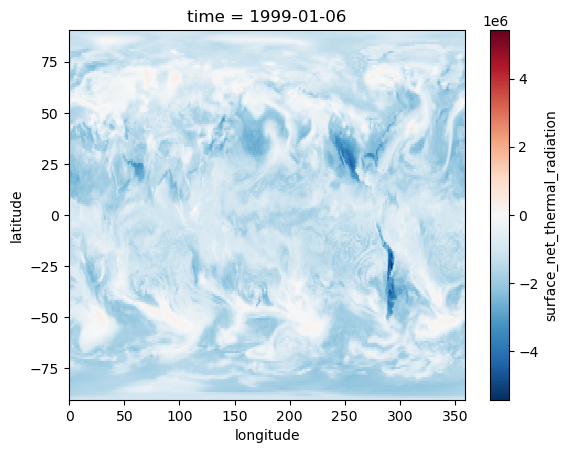

In [182]:
DSera5['surface_net_thermal_radiation'].isel(time=20).plot()
plt.show()

## scalings -> CESM to ERA5

- evaporation = -1 * QFLX
- total_precipitation = 86400 * PRECT {[m/s] -> [m/hr]}
- surface_net_solar_radiation = 21600 * FSNS {[W/m2] -> [J/m2]}
- surface_net_thermal_radiation = -21600 * FLNS {[W/m2] -> [J/m2]}
- surface_sensible_heat_flux = -21600 * SHFLX {[W/m2] -> -[J/m2]}
- surface_latent_heat_flux = -21600 * LHFLX {[W/m2] -> -[J/m2]}
- top_net_solar_radiation = 21600 * FSNT {[W/m2] -> [J/m2]}
- top_net_thermal_radiation = -21600 * FLNT {[W/m2] -> [J/m2]}
- specific_total_water = 1 * Q
- SP = PS
- geopotential_at_surface = PHIS
- tempearture = T

where 21600 = 86400/4 (6 hour time step).

model midpoint coef: 
- hyam, hybm (level)
  
model interface coef: 
- coef_a, coef_b -> hyai, hybi (ilev)

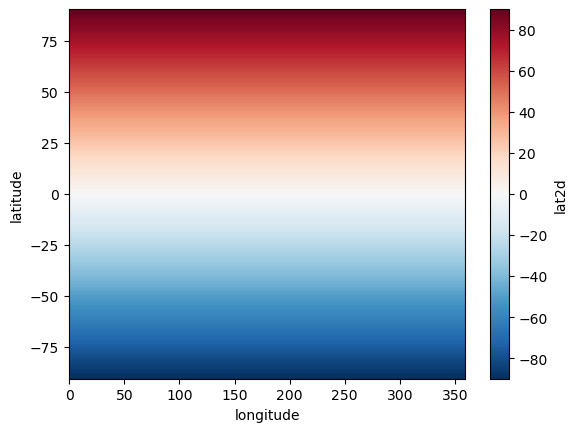

In [186]:
xr.open_zarr('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_mlevel_1deg/static/ERA5_mlevel_1deg_static_subset.zarr')['lat2d'].plot()

In [160]:
DSdo = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg.nc')

In [165]:
levlevds = DScesm[['hyai','hybi','hyam','hybm']].isel(time=0).squeeze()

In [169]:
DSdo['hyai'] = levlevds['hyai']
DSdo['hybi'] = levlevds['hybi']
DSdo['hyam'] = levlevds['hyam']
DSdo['hybm'] = levlevds['hybm']

In [171]:
DSdo.to_netcdf('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs.nc')

In [187]:
DSdo.to_netcdf('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs.nc')

In [202]:
DSdo['lat2d'] = DSdo['PHIS']
DSdo['lon2d'] = DSdo['PHIS']
lon_grid, lat_grid = np.meshgrid(DSdo['longitude'], DSdo['latitude'])
DSdo['lon2d'][:,:] = lon_grid
DSdo['lat2d'][:,:] = lat_grid
DSdo.to_netcdf('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs_latlon.nc')

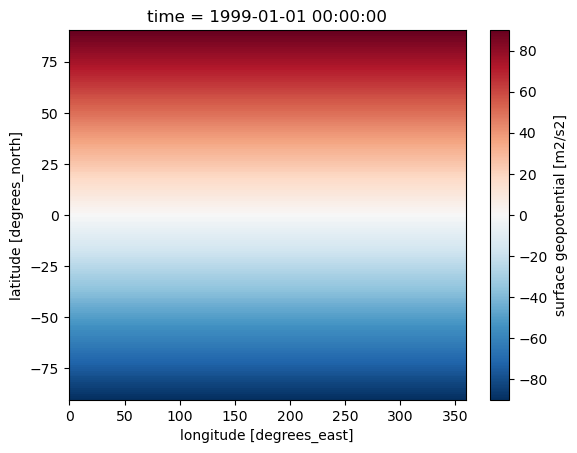

In [201]:
DSdo['lon2d'].plot()

In [203]:
cp /glade/derecho/scratch/dkimpara/LSM_static_variables_ERA5_zhght_onedeg.nc /glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/LSM_static_variables_ERA5_zhght_onedeg.nc

In [194]:
lat_grid

array([[-90.        , -90.        , -90.        , ..., -90.        ,
        -90.        , -90.        ],
       [-89.05759162, -89.05759162, -89.05759162, ..., -89.05759162,
        -89.05759162, -89.05759162],
       [-88.11518325, -88.11518325, -88.11518325, ..., -88.11518325,
        -88.11518325, -88.11518325],
       ...,
       [ 88.11518325,  88.11518325,  88.11518325, ...,  88.11518325,
         88.11518325,  88.11518325],
       [ 89.05759162,  89.05759162,  89.05759162, ...,  89.05759162,
         89.05759162,  89.05759162],
       [ 90.        ,  90.        ,  90.        , ...,  90.        ,
         90.        ,  90.        ]])